In [1]:
%matplotlib inline

seed_value = 100
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

# Data uploading

In [2]:
#AIRPORT_ICAO = "ESGG"
AIRPORT_ICAO = "ESSA"

DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "data")
DATA_DIR = os.path.join(DATA_DIR, "Regression")

# AIF
filename = AIRPORT_ICAO + "_metrics_AIF_horizontal_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_AIF_horizontal_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')

filename = AIRPORT_ICAO + "_metrics_AIF_horizontal_PIs_by_flight_2019_2020.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_AIF_horizontal_PIs_by_flight_df = pd.read_csv(full_filename, sep=' ')

# WIF
filename = AIRPORT_ICAO + "_metrics_WIF_horizontal_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_WIF_horizontal_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')

filename = AIRPORT_ICAO + "_metrics_WIF_horizontal_PIs_by_flight_2019_2020.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_WIF_horizontal_PIs_by_flight_df = pd.read_csv(full_filename, sep=' ')

# TIF
filename = AIRPORT_ICAO + "_metrics_TIF_horizontal_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_TIF_horizontal_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')

filename = AIRPORT_ICAO + "_metrics_TIF_horizontal_PIs_by_flight_2019_2020.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_TIF_horizontal_PIs_by_flight_df = pd.read_csv(full_filename, sep=' ')


# Average Additional Distance

## Medians of Average Additional Distance in TMA vs AIF

                               OLS Regression Results                               
Dep. Variable:     additionalDistanceMedian   R-squared:                       0.817
Model:                                  OLS   Adj. R-squared:                  0.804
Method:                       Least Squares   F-statistic:                     62.42
Date:                      Tue, 21 Dec 2021   Prob (F-statistic):           1.58e-06
Time:                              18:36:50   Log-Likelihood:                -24.896
No. Observations:                        16   AIC:                             53.79
Df Residuals:                            14   BIC:                             55.34
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


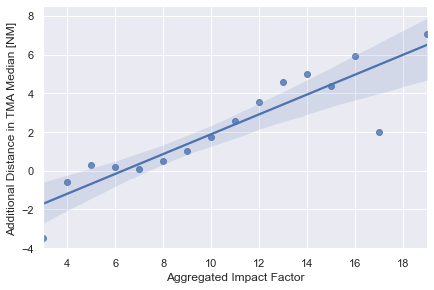

In [3]:
df = metrics_AIF_horizontal_PIs_by_hour_df.copy()

df = df[df['additionalDistanceMean']!=0]

# remove additional distance outliers
p1 = df["additionalDistanceMean"].quantile(0.05)
p2 = df["additionalDistanceMean"].quantile(0.95)
df = df.loc[(df['additionalDistanceMean'] > p1) & (df['additionalDistanceMean'] < p2) ]

df.set_index(['AIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['AIF', 'additionalDistanceMean'])

for idx, group in df.groupby(level='AIF'):
    
    if len(group)<3:
        continue
    
    idx_df = group['additionalDistanceMean']

    idx_median = np.median(idx_df)
    median_df = median_df.append({'AIF': idx, 'additionalDistanceMedian': idx_median}, ignore_index=True)

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='AIF',y='additionalDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Aggregated Impact Factor')
plt.ylabel('Additional Distance in TMA Median [NM]')


#statsmodel:
X_df = median_df[['AIF']]
y_df = median_df[['additionalDistanceMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())

## Medians of Average Additional Distance in TMA vs TIF

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     61.31
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           2.63e-05
Time:                        18:36:51   Log-Likelihood:                -10.162
No. Observations:                  11   AIC:                             24.32
Df Residuals:                       9   BIC:                             25.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7216      0.380     -1.898      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


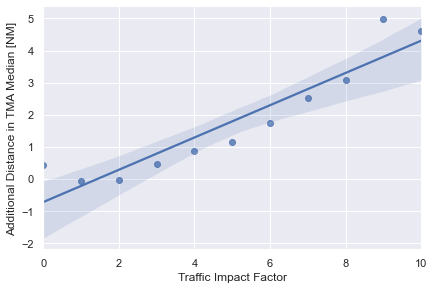

In [4]:
df = metrics_TIF_horizontal_PIs_by_hour_df.copy()

df = df[df['additionalDistanceMean']!=0]

# remove additional distance outliers
p1 = df["additionalDistanceMedian"].quantile(0.05)
p2 = df["additionalDistanceMedian"].quantile(0.95)
df = df.loc[(df['additionalDistanceMedian'] > p1) & (df['additionalDistanceMedian'] < p2) ]
#p2 = df["additionalDistanceMedian"].quantile(0.95)
#df = df.loc[df['additionalDistanceMedian'] < p2]

df.set_index(['TIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['TIF', 'addDistanceMedian'])

for idx, group in df.groupby(level='TIF'):
    
    idx_df = df.loc[idx]['additionalDistanceMedian']
    
    if idx_df.any():
        idx_median = np.median(idx_df)
        median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)

#print(median_df.head())

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='TIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Traffic Impact Factor')
plt.ylabel('Additional Distance in TMA Median [NM]')


#statsmodel:
X_df = median_df[['TIF']]
y_df = median_df[['addDistanceMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())

## Medians of Average Additional Distance in TMA vs WIF

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     2.361
Date:                Tue, 21 Dec 2021   Prob (F-statistic):              0.147
Time:                        18:36:51   Log-Likelihood:                -23.913
No. Observations:                  16   AIC:                             51.83
Df Residuals:                      14   BIC:                             53.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7965      0.685      1.163      0.2

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


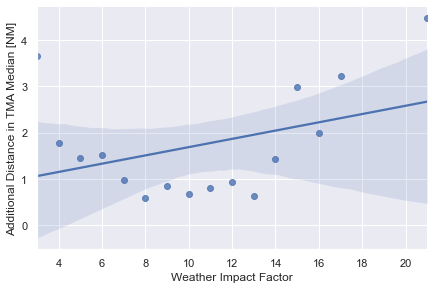

In [5]:
df = metrics_WIF_horizontal_PIs_by_hour_df.copy()

df = df[df['additionalDistanceMean']!=0]

# remove additional distance outliers
p1 = df["additionalDistanceMean"].quantile(0.05)
p2 = df["additionalDistanceMean"].quantile(0.95)
df = df.loc[(df['additionalDistanceMean'] > p1) & (df['additionalDistanceMean'] < p2) ]
#p2 = df["additionalDistanceMean"].quantile(0.95)
#df = df.loc[df['additionalDistanceMean'] < p2]

df.set_index(['WIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['WIF', 'addDistanceMedian'])

for idx, group in df.groupby(level='WIF'):
    
    if len(group)<3:
        continue
    
    idx_df = df.loc[idx]['additionalDistanceMean']
    
    idx_median = np.median(idx_df)
    median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='WIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Weather Impact Factor')
plt.ylabel('Additional Distance in TMA Median [NM]')


#statsmodel:
X_df = median_df[['WIF']]
y_df = median_df[['addDistanceMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())

# Additional Distance in TMA (per flight)

## Medians of Additional Distance in TMA vs AIF (2019-2020)

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     55.48
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           2.05e-06
Time:                        18:36:51   Log-Likelihood:                -19.118
No. Observations:                  17   AIC:                             42.24
Df Residuals:                      15   BIC:                             43.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9946      0.473     -2.104      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


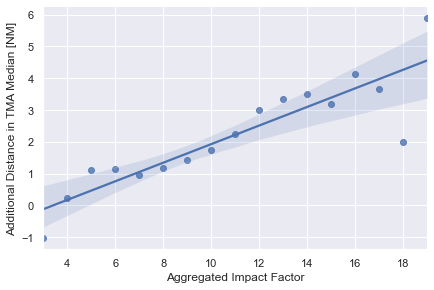

In [6]:
df = metrics_AIF_horizontal_PIs_by_flight_df.copy()

df = df[df['additionalDistanceTMA']!=0]

# remove additional distance outliers
p1 = df["additionalDistanceTMA"].quantile(0.05)
p2 = df["additionalDistanceTMA"].quantile(0.95)
df = df.loc[(df['additionalDistanceTMA'] > p1) & (df['additionalDistanceTMA'] < p2) ]
#p2 = df["additionalDistanceTMA"].quantile(0.95)
#df = df.loc[df['additionalDistanceTMA'] < p2]

median_df = pd.DataFrame(columns=['AIF', 'addDistanceMedian'])

df.set_index(['AIF'], inplace=True)
df.sort_index(inplace=True)

for idx, group in df.groupby(level='AIF'):
    
    idx_df = df.loc[idx]['additionalDistanceTMA']
    
    if idx_df.any():
        idx_median = np.median(idx_df)
        median_df = median_df.append({'AIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
#print(median_df.head())

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='AIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Aggregated Impact Factor')
plt.ylabel('Additional Distance in TMA Median [NM]')


#statsmodel:
X_df = median_df[['AIF']]
y_df = median_df[['addDistanceMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())

## Medians of Additional Distance in TMA vs TIF (2019-2020)

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     28.14
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           0.000491
Time:                        18:36:52   Log-Likelihood:                -10.750
No. Observations:                  11   AIC:                             25.50
Df Residuals:                       9   BIC:                             26.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2223      0.401      0.554      0.5

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


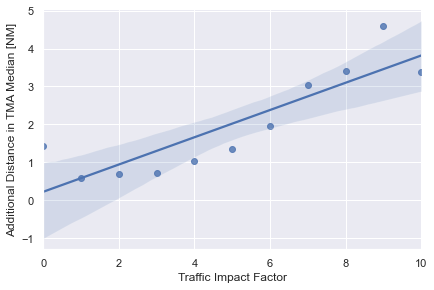

In [7]:
df = metrics_TIF_horizontal_PIs_by_flight_df.copy()

# remove additional distance outliers
p1 = df["additionalDistanceTMA"].quantile(0.05)
p2 = df["additionalDistanceTMA"].quantile(0.95)
df = df.loc[(df['additionalDistanceTMA'] > p1) & (df['additionalDistanceTMA'] < p2) ]
#p2 = df["additionalDistanceTMA"].quantile(0.95)
#df = df.loc[df['additionalDistanceTMA'] < p2]

median_df = pd.DataFrame(columns=['TIF', 'addDistanceMedian'])

df.set_index(['TIF'], inplace=True)
df.sort_index(inplace=True)

for idx, group in df.groupby(level='TIF'):
    
    if len(group)<3:
        continue
    
    idx_df = df.loc[idx]['additionalDistanceTMA']
    
    if idx == 2:
        sorted_idx_df = np.sort(idx_df)
        #print(list(sorted_idx_df))
    
    idx_median = np.median(idx_df)
    median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='TIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Traffic Impact Factor')
plt.ylabel('Additional Distance in TMA Median [NM]')


#statsmodel:
X_df = median_df[['TIF']]
y_df = median_df[['addDistanceMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())

## Medians of Additional Distance in TMA vs WIF (2019-2020)

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     20.94
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           0.000234
Time:                        18:36:52   Log-Likelihood:                -28.164
No. Observations:                  20   AIC:                             60.33
Df Residuals:                      18   BIC:                             62.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5168      0.557      0.928      0.3

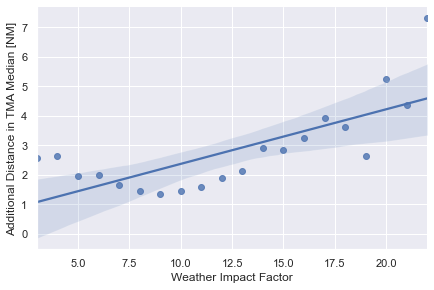

In [8]:
df = metrics_WIF_horizontal_PIs_by_flight_df.copy()

# remove additional distance outliers
p1 = df["additionalDistanceTMA"].quantile(0.05)
p2 = df["additionalDistanceTMA"].quantile(0.95)
df = df.loc[(df['additionalDistanceTMA'] > p1) & (df['additionalDistanceTMA'] < p2) ]
#p2 = df["additionalDistanceTMA"].quantile(0.95)
#df = df.loc[df['additionalDistanceTMA'] < p2]

median_df = pd.DataFrame(columns=['WIF', 'addDistanceMedian'])

df.set_index(['WIF'], inplace=True)
df.sort_index(inplace=True)

for idx, group in df.groupby(level='WIF'):
    
    if len(group)<3:
        continue
                
        '''if idx == 13:
            sorted_idx_df = np.sort(idx_df)
            print(sorted_idx_df)'''
    idx_df = group.loc[idx]['additionalDistanceTMA']
        
    idx_median = np.median(idx_df)
    median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='WIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Weather Impact Factor')
plt.ylabel('Additional Distance in TMA Median [NM]')

#statsmodel:
X_df = median_df[['WIF']]
y_df = median_df[['addDistanceMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())